Isolation Forest are tree based model or algorithm introduced by Fei Tony Liu and Zhi- Hua Zhou in 2008. It uses decision trees to efficiently isolate anomalies by randomly selecting features and splitting data based on threshold values (minimum and maximum values of the selected features). This approach is effective in quickly identifying outliers, making it well-suited for large datasets where anomalies are rare and distinct. It works best on high- dimensional data.

Dataset is KDDCUP 1999, which contains an extensive amount of data representing a wide variety of intrusion attacks.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble imalignport IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [4]:
df = pd.read_csv('/kaggle/input/d/himanshunakrani/kdd-cup-1999-data/kddcup.data.corrected', index_col=None)
df.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,...,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


renaming columns for better readability.

In [8]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", 
           "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
           "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
           "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


Filter out the entire data frame to only include data entries that involve an HTTP attack, then drop the 'Service' column.

In [9]:
df = df[df['service'] == 'http']
df.drop('service', axis=1)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,SF,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,SF,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,SF,238,1282,0,0,0,0,0,...,5,1.0,0.0,0.20,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,tcp,SF,212,2288,0,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898426,0,tcp,SF,219,236,0,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,SF,218,3610,0,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,SF,219,1234,0,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [10]:
df['label'].value_counts()

label
normal.       619045
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: count, dtype: int64

normal data entries have majority, around .649% of data entries fro all http atatck 
converting categorical data value into numeric 

In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,9,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,0,9,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
2,0,0,0,9,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
3,0,0,0,9,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4
4,0,0,0,9,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,4


Building MOdel

In [18]:
for f in range(0,3):
    df = df.iloc[np.random.permutation(len(df))]
df2 = df[:500000]
labels = df2['label']
df_validate = df[500000:]
x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size = 0.2, random_state = 42)
x_val, y_val = df_validate, df_validate['label']
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("Shapes:\nx_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("Shapes:\nx_val:%s\ny_val:%s\n" % (x_val.shape, y_val.shape))

Shapes:
x_train:(400000, 42)
y_train:(400000,)

Shapes:
x_test:(100000, 42)
y_test:(100000,)

Shapes:
x_val:(123090, 42)
y_val:(123090,)



In [19]:
IF = IsolationForest(n_estimators=100, max_samples=256, contamination=0.1, random_state = 42)
IF.fit(x_train)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=256, random_state=42)

In [20]:
anomaly_score = IF.decision_function(x_val)

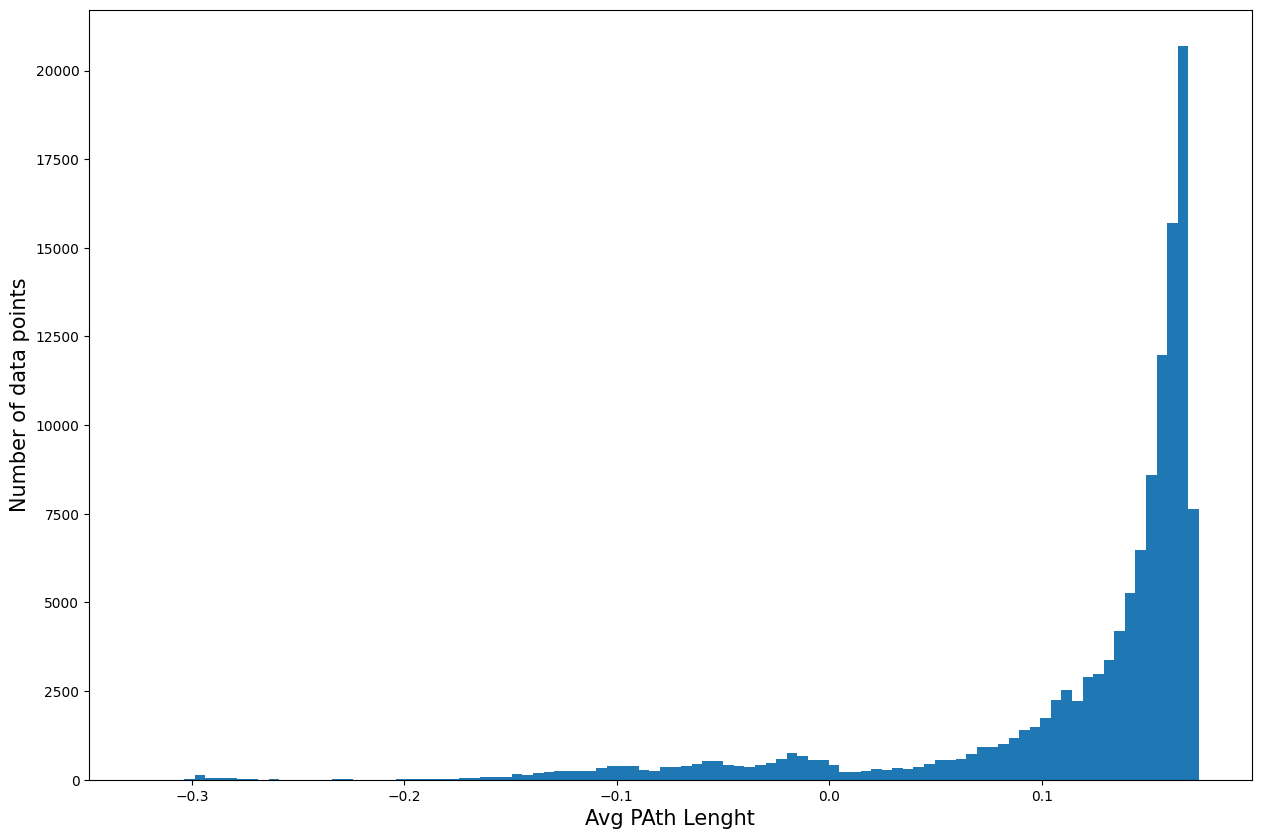

In [23]:
plt.figure(figsize=(15,10))
plt.hist(anomaly_score, bins=100)
plt.xlabel('Avg PAth Lenght', fontsize=15)
plt.ylabel('Number of data points', fontsize=15)
plt.show()

Let’s calculate the AUC to see how well the model did. Looking at the graph, there appears to be a few anomalous data with average path of less than -0.15. You expect there to be a few outliers within the normal range of data,so let’s pick something more extreme, such as -0.19.
Note: The lesser the path length, the more likely the data is to be anomalous, hence why there’s a curve that increases drastically as the graph goes right.
Classifying anomalies based on a threshold that we picked from a graph and generating the AUC score from that set of labels for each point.

In [25]:
from sklearn.metrics import roc_auc_score
anomalies = anomaly_score > -0.19
matches = y_val == list(encoded.classes_).index('normal.')
auc = roc_auc_score(anomalies, matches)
print('AUC: {:.2F}'.format(auc))

AUC: 0.97


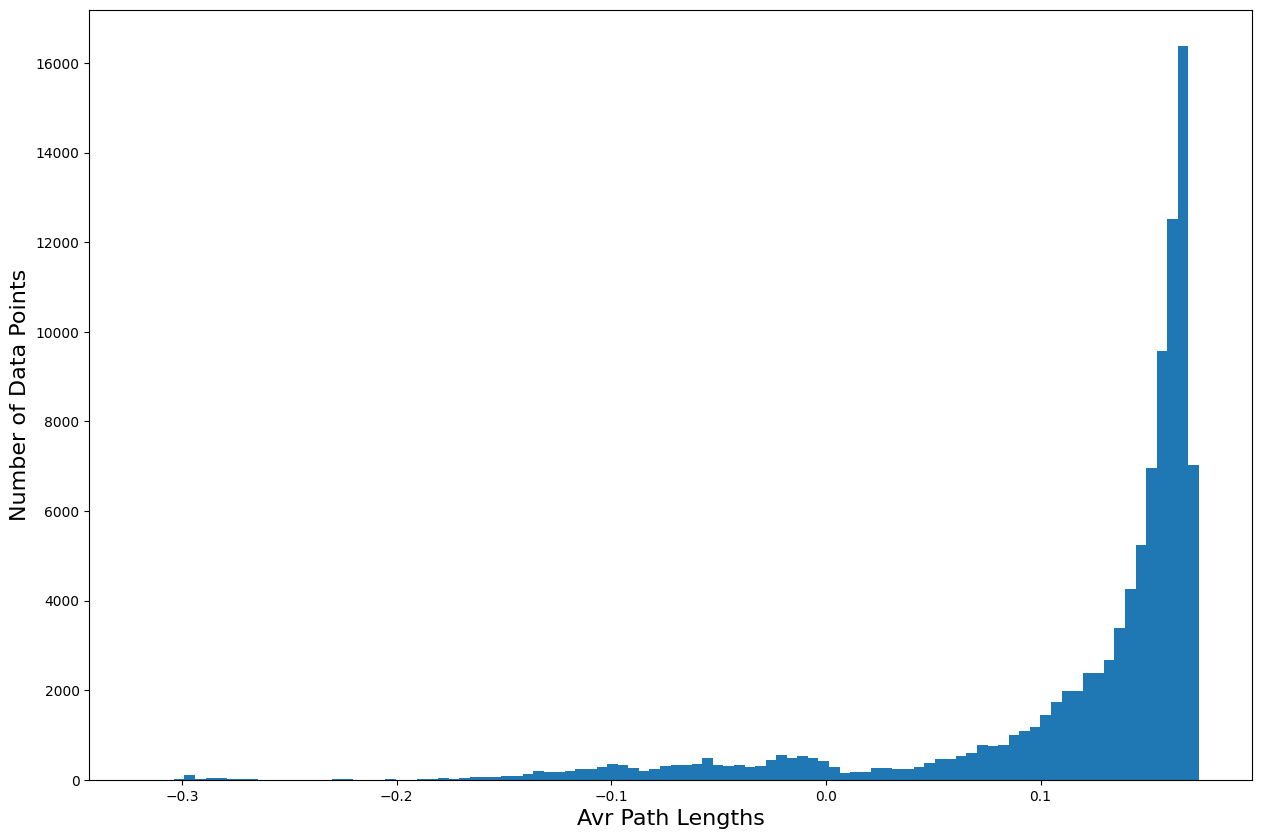

In [31]:
anomaly_scores_test = IF.decision_function(x_test)
plt.figure(figsize = (15, 10))
plt.hist(anomaly_scores_test, bins=100)
plt.xlabel('Avr Path Lengths', fontsize=16), plt.ylabel('Number of Data Points', fontsize=16)
plt.show()

In [32]:
anomalies_test = anomaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index('normal.')
auc = roc_auc_score(anomalies_test, matches)
print('AUC: {:.2%}'.format(auc))

AUC: 97.94%


An Isolation Forest works well for multidimensional data

